## Time Series Data Analysis and Plotting

Time series analysis - investigating climate data using Python and Pandas. Time series data are repeated measurements of the same phenomenon, taken sequentially over time.

`import pandas as pd`

`from matplotlib import pyplot as plt`

`%matplotlib inline`

## Create DataFrames

GISTEMP.csv - These data represent temperature anomalies (differences from the mean/expected value) per month and per season (DJF=Dec-Feb, MAM=Mar-May, etc).

CO2.csv - These data give us the average CO₂ emission (in metric tons) per person. The dataset is divided up by countries and other categories such as ‘World’ or ‘Upper middle income.’

Create a dataFrame from the raw temperature anomalies dataset. Use `skiprows=1`.

`raw_t = pd.read_csv("./data/GISTEMP.csv", skiprows=1)`

`raw_t.head()`

Create a dataFrame from the CO₂ emissions dataset. Use `skiprows=3.`

`raw_e = pd.read_csv("./data/CO2.csv", skiprows=3)`

`raw_e.head()`

## Data Wrangling

Transforming data from one format to another to make them usable

### Wrangling Temperature Data

* Create a DateTime index

* Handling missing values

* Resampling to a different frequency


### Creating a DateTime index

For the temperature data, create an empty dataframe with a DateTime index of monthly frequency. Use the raw data to populate the new dataframe.

Use the [date_range()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) function to create a date range index. The index will range from January 1880 to June 2019.

`date_rng = pd.date_range(start="1/1/1880", end="6/1/2019", freq="M")`

Create an empty dataframe with one column named `date` containing the values from the date index

`t = pd.DataFrame(date_rng, columns=["date"])`

Create a column for the anomoly values

`t["Avg_Anomaly_deg_C"] = None`

Set the index to the date column (DateTime index)

`t.set_index("date", inplace=True)`

Extract all rows of temperature data from the year and month columns (0 through 12).

`raw_t = raw_t.iloc[:,:13]`

### Using the Apply Function

Import the following libraries

`from datetime import datetime` *useful for parsing dates and times*

`import calendar` *used to get the last day of each month*

Use the [apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) function to step through the rows of the raw data and apply them to the new dataframe.

Define a function to populate the dataframe with row values from the raw temperature data:

`def populate_anom():`

&nbsp;&nbsp;&nbsp;&nbsp;`year = row["Year"]`

&nbsp;&nbsp;&nbsp;&nbsp;`monthly_anomolies = row.iloc[1:]`

&nbsp;&nbsp;&nbsp;&nbsp;`months = monthly_anomolies.index`

&nbsp;&nbsp;&nbsp;&nbsp;`for month in monthly_anomolies.index:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`t.loc[date_index] = monthly_anomolies[month]`

`strptime` creates a  date time object from a string

`strftime` creates a string from a date time object

For more on strptime and strftime see https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

In [7]:
def populate_anom(row):
    year = row["Year"]
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, "%b").month)[1]
        date_index = datetime.strptime(f"{year} {month} {last_day}", "%Y %b %d")
        t.loc[date_index] = monthly_anomolies[month]


        
### Lambda
 
 A lambda function is a small anonymous function that can take any number of arguments, but can only have one expression.
 
Example:
 
`x = lambda a : a + 10`

`(x(5))`

Using lambda, apply the `populate_anom()` function to each row of raw data (axis=1)

`_ = raw_t.apply(lambda row: populate_anom(row), axis=1)`

In [22]:
def populate_anom(row):
    year = row["Year"]
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, "%b").month)[1]
        date_index = datetime.strptime(f"{year} {month} {last_day}", "%Y %b %d")
        t.loc[date_index] = monthly_anomolies[month]

## Formatting Values

Handling missing values and converting data types

Using the [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to populate `NaN` values

Define a function to convert values to floats, and return a 'NaN = Not a Number' if not possible

`import numpy as np`

`def clean_anomaly_value(raw_value):`

&nbsp;&nbsp;&nbsp;&nbsp;`try:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return float(raw_value)`

&nbsp;&nbsp;&nbsp;&nbsp;`except:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return np.NaN`

`apply` the function to each raw_value in the `"Avg_Anomaly_deg_C"` column

Fill NaN values using `method="ffill"`

`t.fillna(method="ffill", inplace=True)`

In [10]:
import numpy as np

def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN

#Apply above function to all anomaly values in DataFrame
t["Avg_Anomaly_deg_C"] = t["Avg_Anomaly_deg_C"].apply(lambda raw_value: clean_anomaly_value(raw_value))
t.fillna(method="ffill", inplace=True)
t

Avg_Anomaly_deg_C
date                         
1880-01-31              -0.29
1880-02-29              -0.18
1880-03-31              -0.11
1880-04-30              -0.20
1880-05-31              -0.12
...                       ...
2019-08-31               0.90
2019-09-30               0.90
2019-10-31               0.90
2019-11-30               0.90
2019-12-31               0.90

[1680 rows x 1 columns]

### Create a Simple Plot

`plt.figure(figsize=(10,8))`

`plt.xlabel('Time')`

`plt.ylabel('Temperature Anomaly (°Celsius)')`

`plt.plot(t, color='#1C7C54', linewidth=1.0)`

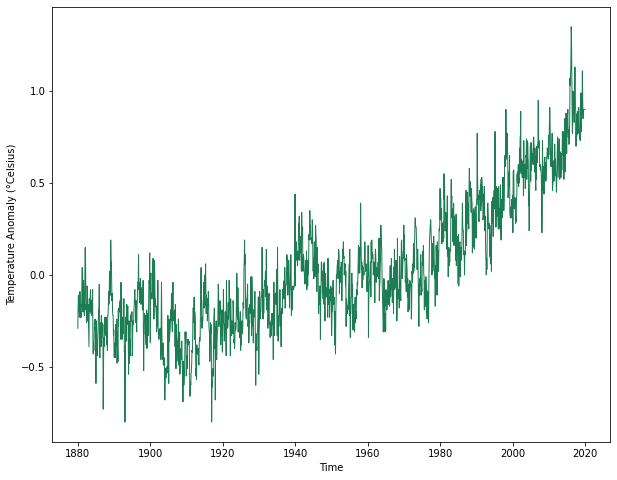

In [11]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t, color='#1C7C54', linewidth=1.0)

### Resampling Data

Sometimes data are too granular to visualize nicely. The [resample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) function can change the frequency from months to years.

Downsample the temperature data into years, the string ‘A’ represents ‘calendar year-end’. 

`t.resample('A').mean().head()`

In [12]:
t.resample('A').mean().head()

Avg_Anomaly_deg_C
date                         
1880-12-31          -0.187500
1881-12-31          -0.100833
1882-12-31          -0.110000
1883-12-31          -0.191667
1884-12-31          -0.294167

#### Plot the Resampled Data

`plt.figure(figsize=(10,8))`

`plt.xlabel("Time")`

`plt.ylabel("Temperature Anomaly (°Celsius)")`

`plt.plot(t.resample("A").mean(), color="#1C7C54", linewidth=1.0)`


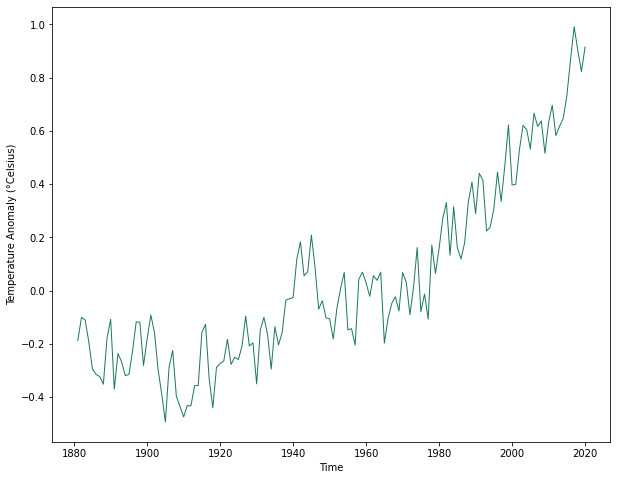

In [13]:
plt.figure(figsize=(10, 8))
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°Celsius)")
plt.plot(t.resample("A").mean(), color="#1C7C54", linewidth=1.0)

### Wrangling CO2 Data

* Slicing and Searching

* Useful functions

Select only the row representing the years containing CO₂ emissions for the entire world. 

Create a new dataframe that uses a DateTime index — and then use the raw data to populate it.

In [14]:
raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']

1960      1961      1962      1963      1964      1965      1966  \
257  0.003108  0.003079  0.003151  0.003256  0.003373  0.003454  0.003553   

         1967      1968      1969  ...      2009      2010      2011  \
257  0.003593  0.003701  0.003842  ...  0.004572  0.004832  0.004932   

         2012      2013      2014      2015      2016  2017  2018  
257  0.004983  0.004986  0.004941  0.004902  0.004849   NaN   NaN  

[1 rows x 59 columns]

In [15]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  
#Select just the row with co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_world = raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']
#print (raw_e_world)

# Transpose the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
#print (raw_e_world)
raw_e_world.columns = ['value']

# Create a new dataFrame with a date range 1960-2018.
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])

#Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e


Global CO2 Emissions per Capita
date                                       
1960-12-31                         0.003108
1961-12-31                         0.003079
1962-12-31                         0.003151
1963-12-31                         0.003256
1964-12-31                         0.003373
1965-12-31                         0.003454
1966-12-31                         0.003553
1967-12-31                         0.003593
1968-12-31                         0.003701
1969-12-31                         0.003842
1970-12-31                         0.004035
1971-12-31                         0.004103
1972-12-31                         0.004182
1973-12-31                         0.004325
1974-12-31                         0.004250
1975-12-31                         0.004148
1976-12-31                         0.004313
1977-12-31                         0.004371
1978-12-31                         0.004346
1979-12-31                         0.004509
1980-12-31                         0.004385
1981-12-31                         0.004177
1982-12-31                         0.004068
1983-12-31                         0.003981
1984-12-31                         0.004054
1985-12-31                         0.004105
1986-12-31                         0.004157
1987-12-31                         0.004188
1988-12-31                         0.004267
1989-12-31                         0.004286
1990-12-31                         0.004218
1991-12-31                         0.004196
1992-12-31                         0.004077
1993-12-31                         0.004051
1994-12-31                         0.004021
1995-12-31                         0.004050
1996-12-31                         0.004092
1997-12-31                         0.004079
1998-12-31                         0.004021
1999-12-31                         0.004024
2000-12-31                         0.004078
2001-12-31                         0.004050
2002-12-31                         0.004096
2003-12-31                         0.004269
2004-12-31                         0.004409
2005-12-31                         0.004532
2006-12-31                         0.004628
2007-12-31                         0.004650
2008-12-31                         0.004754
2009-12-31                         0.004572
2010-12-31                         0.004832
2011-12-31                         0.004932
2012-12-31                         0.004983
2013-12-31                         0.004986
2014-12-31                         0.004941
2015-12-31                         0.004902
2016-12-31                         0.004849
2017-12-31                              NaN
2018-12-31                              NaN

Select all data after the year 2011:

`e[e.index.year>2011]`

In [16]:
e[e.index.year>2011]

Global CO2 Emissions per Capita
date                                       
2012-12-31                         0.004983
2013-12-31                         0.004986
2014-12-31                         0.004941
2015-12-31                         0.004902
2016-12-31                         0.004849
2017-12-31                              NaN
2018-12-31                              NaN

Fill NaN vales using forward fill

`e.fillna(method='ffill', inplace=True)`

`e[e.index.year>2011]`

In [17]:
e.fillna(method='ffill', inplace=True)
e[e.index.year>2011]

Global CO2 Emissions per Capita
date                                       
2012-12-31                         0.004983
2013-12-31                         0.004986
2014-12-31                         0.004941
2015-12-31                         0.004902
2016-12-31                         0.004849
2017-12-31                         0.004849
2018-12-31                         0.004849

Use the DateTime index to search on a range

`e['1984-01-04':'1990-01-06']`

In [18]:
e['1984-01-04':'1990-01-06']

Global CO2 Emissions per Capita
date                                       
1984-12-31                         0.004054
1985-12-31                         0.004105
1986-12-31                         0.004157
1987-12-31                         0.004188
1988-12-31                         0.004267
1989-12-31                         0.004286

#### Plotting the Temperature Data

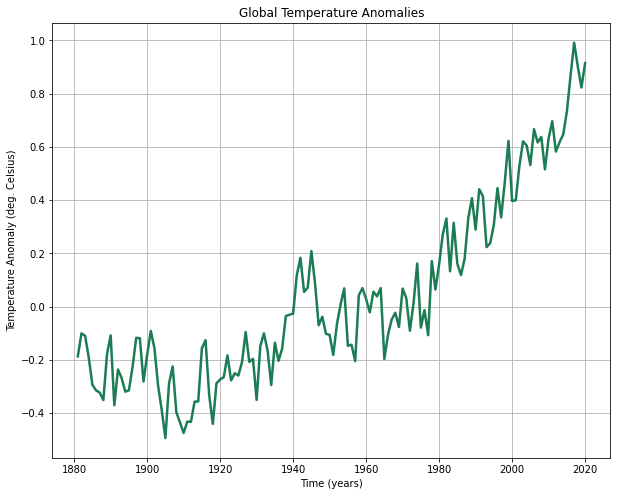

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

t_resampled = t.resample('A').mean()

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)
ax.set(xlabel="Time (years)", ylabel="Temperature Anomaly (deg. Celsius)", title="Global Temperature Anomalies")
ax.grid()

#### Plot the CO2 Data

Create figures and axes

`fig, ax = plt.subplots(figsize=(10,8))`

Plot co2 emissions data with specific colour and line thickness

`ax.plot(e, color='#3393FF', linewidth=2.5)`

Set axis labels and graph title

`ax.set(xlabel="Time (years)", ylabel="Emissions (Metric Tons per Capita)", title="Global CO2 Emission over Time")`

Enable grid

`ax.grid()`

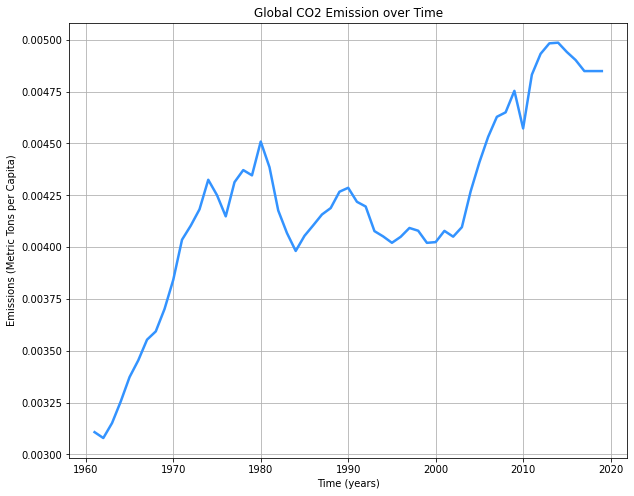

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(e, color="#3393FF", linewidth=2.5)
ax.set(xlabel='Time (years)', ylabel="Emissions (Metric Tons per Capita)",title="Global CO2 Emission over Time")
ax.grid()